### Repeat the previous exercise using the extended feature set. Compare the results.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from lxmls import DATA_PATH
import lxmls
import lxmls.sequences.crf_online as crfo
import lxmls.readers.pos_corpus as pcc
import lxmls.sequences.id_feature as idfc
import lxmls.sequences.extended_feature as exfc
from lxmls.readers import pos_corpus

In [3]:
corpus = lxmls.readers.pos_corpus.PostagCorpus()
train_seq = corpus.read_sequence_list_conll(DATA_PATH + "/train-02-21.conll", 
                                            max_sent_len=10, max_nr_sent=1000)

test_seq = corpus.read_sequence_list_conll(DATA_PATH + "/test-23.conll", 
                                           max_sent_len=10, max_nr_sent=1000)

dev_seq = corpus.read_sequence_list_conll(DATA_PATH + "/dev-22.conll", 
                                          max_sent_len=10, max_nr_sent=1000)

In [4]:
feature_mapper = exfc.ExtendedFeatures(train_seq)
feature_mapper.build_features()

In [12]:
# Exploring the extended feature mapper
len(feature_mapper.feature_dict)  # With the ID features we had 2683

7261

In [13]:
# Exploring the extended feature mapper
feature_mapper.feature_dict  # some of the new features we have relative to the ID features

{'init_tag:noun': 0,
 'id:Ms.::noun': 1,
 'uppercased::noun': 2,
 'suffix:.::noun': 3,
 'suffix:s.::noun': 4,
 'prefix:M::noun': 5,
 'prefix:Ms::noun': 6,
 'id:Haag::noun': 7,
 'suffix:g::noun': 8,
 'suffix:ag::noun': 9,
 'suffix:aag::noun': 10,
 'prefix:H::noun': 11,
 'prefix:Ha::noun': 12,
 'prefix:Haa::noun': 13,
 'prev_tag:noun::noun': 14,
 'id:plays::verb': 15,
 'suffix:s::verb': 16,
 'suffix:ys::verb': 17,
 'suffix:ays::verb': 18,
 'prefix:p::verb': 19,
 'prefix:pl::verb': 20,
 'prefix:pla::verb': 21,
 'prev_tag:noun::verb': 22,
 'id:Elianti::noun': 23,
 'suffix:i::noun': 24,
 'suffix:ti::noun': 25,
 'suffix:nti::noun': 26,
 'prefix:E::noun': 27,
 'prefix:El::noun': 28,
 'prefix:Eli::noun': 29,
 'prev_tag:verb::noun': 30,
 'id:.::.': 31,
 'prev_tag:noun::.': 32,
 'final_prev_tag:.': 33,
 'init_tag:det': 34,
 'id:The::det': 35,
 'uppercased::det': 36,
 'suffix:e::det': 37,
 'suffix:he::det': 38,
 'prefix:T::det': 39,
 'prefix:Th::det': 40,
 'id:new::adj': 41,
 'suffix:w::adj': 42,

In [5]:
crf_online = crfo.CRFOnline(corpus.word_dict, corpus.tag_dict, feature_mapper)
crf_online.num_epochs = 20
crf_online.train_supervised(train_seq)


Epoch: 0 Objective value: -7.141596
Epoch: 1 Objective value: -1.807511
Epoch: 2 Objective value: -1.218877
Epoch: 3 Objective value: -0.955739
Epoch: 4 Objective value: -0.807821
Epoch: 5 Objective value: -0.712858
Epoch: 6 Objective value: -0.647382
Epoch: 7 Objective value: -0.599442
Epoch: 8 Objective value: -0.562584
Epoch: 9 Objective value: -0.533411
Epoch: 10 Objective value: -0.509885
Epoch: 11 Objective value: -0.490548
Epoch: 12 Objective value: -0.474318
Epoch: 13 Objective value: -0.460438
Epoch: 14 Objective value: -0.448389
Epoch: 15 Objective value: -0.437800
Epoch: 16 Objective value: -0.428402
Epoch: 17 Objective value: -0.419990
Epoch: 18 Objective value: -0.412406
Epoch: 19 Objective value: -0.405524


In [6]:

pred_train = crf_online.viterbi_decode_corpus(train_seq)
pred_dev = crf_online.viterbi_decode_corpus(dev_seq)
pred_test = crf_online.viterbi_decode_corpus(test_seq)

eval_train = crf_online.evaluate_corpus(train_seq, pred_train)
eval_dev = crf_online.evaluate_corpus(dev_seq, pred_dev)
eval_test = crf_online.evaluate_corpus(test_seq, pred_test)

In [7]:

print("CRF - Extended Features Accuracy Train: %.3f Dev: %.3f Test: %.3f" \
      %(eval_train, eval_dev,eval_test))

CRF - Extended Features Accuracy Train: 0.984 Dev: 0.899 Test: 0.894


Compare the errors obtained with the two different feature sets.

- Do some error analysis: what errors were correct by using more features?

- Can you think of other features to use to solve the errors found?

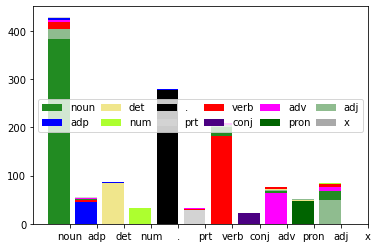

In [8]:
import lxmls.sequences.confusion_matrix as cm

confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, pred_test,
                                             len(corpus.tag_dict), crf_online.get_num_states())

cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict,
                            range(crf_online.get_num_states()), 'Confusion matrix')
